Домашняя работа

Easy:
    
Для данных с Титаника обучить модели логистической регресси и решающего дерева на 80% обучающей выборки и проверить результат на 20%. У какой модели результат лучше?



In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("train.csv")
df["Sex"]=df["Sex"].apply(lambda x: 1 if x == "female" else 0)

In [3]:
x_df = df[["Pclass","Sex","Age","SibSp","Parch","Fare"]].fillna(0)
y_df = df["Survived"]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.8)
x_train.shape, x_test.shape

((712, 6), (179, 6))

Возьмем модель линейной регрессии и обучим ее

In [24]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
accuracy_score(y_predict, y_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.776536312849162

In [6]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_pred, y_test)

0.7653631284916201

In [13]:
model=DecisionTreeClassifier(max_depth=100,random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_pred, y_test)

0.7486033519553073

Даже при увеличения глубины дерева - точность решающего дерева ниже, чем у логистической регрессии.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

Normal

Используя кросс-валидацию, применить к данным Титаника модель RandomForestClassifier. Сравнить с первыми двумя моделями.

In [21]:
seed=12
rc=RandomForestClassifier(n_estimators=400,min_samples_leaf=0.12,random_state=seed)
rc.fit(x_train, y_train)
y_pred =rc.predict(x_test)
accuracy_score(y_pred, y_test)

0.7653631284916201

In [22]:
cross_val_score(rc, x_train, y_train, cv=10)

array([0.76388889, 0.72222222, 0.84722222, 0.8028169 , 0.76056338,
       0.81690141, 0.77464789, 0.84507042, 0.70422535, 0.68571429])

In [23]:
from numpy import mean
print(mean(cross_val_score(rc, x_train, y_train, cv=10)))

0.7723272971160295


In [26]:
print("RandomForestClassifier",mean(cross_val_score(rc, x_train, y_train, cv=10)))
print("RandomForestClassifier",accuracy_score(y_pred, y_test))
print("LogisticRegression",accuracy_score(y_predict, y_test))

RandomForestClassifier 0.7723272971160295
RandomForestClassifier 0.7653631284916201
LogisticRegression 0.776536312849162


Hard:
Алгоритм решения задачи:

Написать функцию для подсчета прогноза линейной регрессии  𝑓(𝑤,𝑏,𝑥)=𝑤𝑥+𝑏 , в которой w и b - веса модели, которые мы будем оптимизировать, а x - входные данные (зависимая переменная). Обращаю внимание, что функция должна быть векторизована, то есть в x должна быть возможность передать вектор значений, а не одно число.

Написать функцию ошибки для модели  𝐽(𝑤,𝑏,𝑥) .  𝑤 ,  𝑏  - параметры модели, а  𝑥  - вектор входящих данных. В качестве ошибки будем использовать Mean Squared Error (MSE).

Минимизировать функцию J по параметрам  𝑤  и  𝑏 , используя данные  𝑥 . Минимизацию можно проводить при помощи функции minimize.

Подставить получившиеся минимальные значения w и b в функцию f, нарисовать диаграмму рассеивания (scatter plot) и отобразить работу модели (пример графика есть в этом ноутбуке)

In [27]:
data=pd.read_csv("weight-height.csv")
data.isnull().any()
data["Gender"]=data["Gender"].apply(lambda x: 1 if x == "female" else 0)
data.head()

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


Вопрос : Будем исследовать как рост зависит от веса для мужчин.

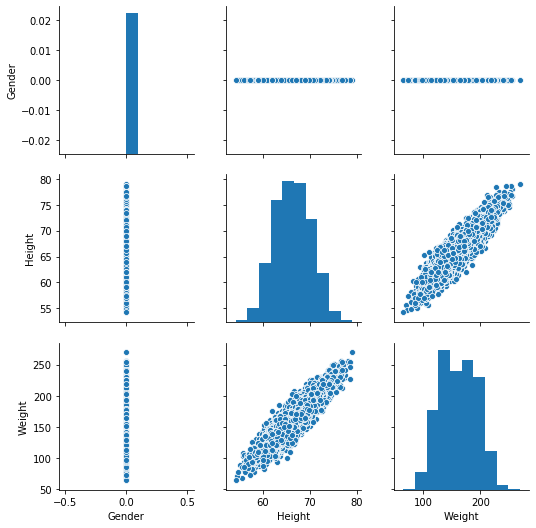

In [28]:
sns.pairplot(data)

Для поиска оптимальной прямой воспользуемся  оценивателем LinearRegression.

In [29]:
from sklearn.linear_model import LinearRegression
x=data["Weight"].values
y=data["Height"].values
x=x.reshape(-1,1)


In [30]:
new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print('intercept:', new_model.intercept_)

intercept: [48.47790261]


In [31]:
print('slope:', new_model.coef_,'intercept:', new_model.intercept_)

slope: [[0.11081279]] intercept: [48.47790261]


In [32]:
w=0.11081279
b=48.47790261

In [33]:
def model(x,y):
    h=x.values
    r=y.values
    a=LinearRegression().fit(h.reshape(-1,1), r.reshape((-1, 1)))
    print('slope:', new_model.coef_,'intercept:', new_model.intercept_)
    p=w*x.values+b
    return p 

model(data["Weight"],data["Height"])      

slope: [[0.11081279]] intercept: [48.47790261]


array([75.28280323, 66.46397892, 72.05231036, ..., 62.71461113,
       66.634851  , 61.07167676])

Согласно данным наша модель будет выглядеть как 

Height(predicted)=0.11081279*Weight + 48.47790261

In [34]:
height_pred=(w*data["Weight"]+b).values
height_pred

array([75.28280323, 66.46397892, 72.05231036, ..., 62.71461113,
       66.634851  , 61.07167676])

![title](1_tnSFGMEsrpnb753jc_ha6Q.png)

In [35]:
def mse(targets):
    return np.mean((targets.values- height_pred)**2)

In [36]:
print('MSE=',mse(data["Height"]))

MSE= 2.1437101968835863


Вручную:

0.1108127948401789The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
 48.4779026141795


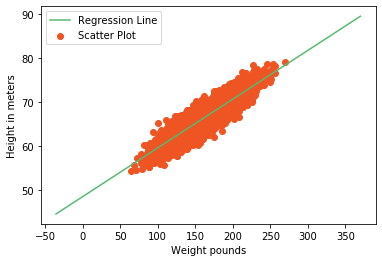

In [45]:
from scipy import stats, optimize
import numpy as np
import statistics
from scipy.optimize import minimize
X=data["Weight"].values
Y=data["Height"].values
n = len(X)
mean_x = np.mean(X)
mean_y = np.mean(Y)
max_x = np.max(x) + 100
min_x = np.min(y) - 100
 
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    m = numer / denom
    c = mean_y - (m * mean_x)
print(m,c)
max_x = np.max(X) + 100
min_x = np.min(X) - 100
 
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = c + m * x
 
# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
 
plt.xlabel('Weight pounds')
plt.ylabel('Height in meters')
plt.legend()
plt.show()

Минимизируя ошибку

In [46]:
def error1(w):
    s=0
    x=data['Weight']
    y=data['Height']
    for i in range(1,len(data.index)):
     s+=(y[i]-w[0]-w[1]*x[i])**2
    return s

import scipy.optimize as optimize
min = optimize.minimize(error1, np.array([0,0]), method = 'L-BFGS-B', bounds=((-100,100),(-5, 5)))

min.x, min.fun

(array([48.47626302,  0.11082384]), 21435.038982043945)

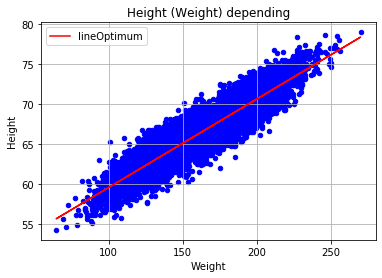

In [47]:
x=np.array(data['Weight'])

w0,w1=min.x
y = [w0+t*w1 for t in x]

data.plot(y='Height',x='Weight', kind='scatter', 
           color='blue',  title='Height (Weight) depending')

plt.plot(x, y, color="red", label="lineOptimum")

plt.grid(True)
plt.legend(loc='upper left')